# CASE IFOOD - Storytelling

## Análise Exploratória dos Dados
### DataBase:
* Netflix
* IMDb
* Ifood entregador
* Browser
* Busca google



#### Autoria: Demétrio Fragoso

## Importação das bibliotecas 

In [1]:
import seaborn as sns

In [2]:
import datetime as dt

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
from PIL import Image

###  - DATABASE -

# NETFLIX

Importando a base de dados

In [8]:
df = pd.read_csv('Base dados\ViewingActivity.csv')
df.head(26)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Djalma Costa,2020-09-04 20:30:05,00:38:41,NaN,Dançarina Imperfeita,NaN,LG 2013 MTK Smart TV,01:26:23,01:26:23,BR (Brazil)
1,Djalma Costa,2020-09-04 19:34:44,00:07:05,NaN,Dançarina Imperfeita,NaN,LG 2013 MTK Smart TV,00:45:52,Not latest view,BR (Brazil)
2,Djalma Costa,2020-02-11 00:01:01,00:06:17,NaN,Cinderela,NaN,Google Chromecast V5 Streaming Stick,00:08:41,00:08:41,BR (Brazil)
3,Djalma Costa,2020-02-11 00:00:09,00:00:39,NaN,Cinderella 3D,NaN,Google Chromecast V5 Streaming Stick,00:04:09,00:04:09,BR (Brazil)
4,Djalma Costa,2020-02-10 23:50:34,00:09:28,NaN,Alguém Especial,NaN,Google Chromecast V5 Streaming Stick,00:09:28,00:09:28,BR (Brazil)
5,Djalma Costa,2020-02-10 23:49:11,00:01:17,NaN,"A Anatomia de Grey: Temporada 1: Longa noite, ...",NaN,Google Chromecast V5 Streaming Stick,00:01:17,00:01:17,BR (Brazil)
6,Djalma Costa,2020-02-10 23:45:14,00:03:45,NaN,Nosso Último Verão,NaN,Google Chromecast V5 Streaming Stick,00:22:43,00:22:43,BR (Brazil)
7,Djalma Costa,2020-02-10 23:43:35,00:00:01,NaN,Nosso Último Verão,NaN,Android DefaultWidevineL3Phone Android Phone,00:00:01,Not latest view,BR (Brazil)
8,Djalma Costa,2019-04-15 15:39:12,00:00:22,NaN,Loja de Unicórnios,NaN,Android DefaultWidevineL3Phone Android Phone,00:33:52,00:33:52,BR (Brazil)
9,Djalma Costa,2019-04-15 15:34:26,00:03:41,NaN,Loja de Unicórnios,NaN,Android DefaultWidevineL3Phone Android Phone,00:29:11,Not latest view,BR (Brazil)


In [9]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

### Alterações no DateFrame

Alterando para datetime a coluna start time e convertendo no horario(brasil UTC-03:00)  

In [10]:
df['Start Time'] = pd.to_datetime(df['Start Time'],utc=True)
df = df.set_index('Start Time')
df.index = df.index.tz_convert('America/Sao_Paulo')
df = df.reset_index()

Criando as colunas Ano,Mês, dia e dia da semana

In [11]:
df['Ano'], df['Mês'] = df['Start Time'].dt.year, df['Start Time'].dt.month_name()
df['Dia'] = df['Start Time'].dt.day
df['hour'] = df['Start Time'].dt.hour
df['Dia da Semana'] = df['Start Time'].dt.day_name()

Alterando o tipo do dado na coluna duração, inserindo a coluna duration (min)

In [12]:
df['Duration (min)'] = df['Duration'].str.split(':').apply(
    lambda x: float(x[0]) * 60.0 + float(x[1]) + float(x[2]) / 60.0)

Criando as colunas de duração(hora) e (min)

In [13]:
df['Duration (hours)'] = df['Duration (min)']/60.0
df['Duration (days)'] = df['Duration (hours)']/24.0

Dividindo a coluna 'Title' em duas colunas(Temporada e Episódio).

In [14]:
df[['Name Title','Temporada', 'Episódio']] = df['Title'].str.split(':',n=2, expand=True)
df.drop('Title', axis=1, inplace=True)

Inserindo a coluna categoria (filme ou serie)

In [15]:
df['Type View'] = df.apply(lambda x:'Filme' if pd.isnull(x['Episódio']) else 'Serie TV' , axis=1)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Start Time               5730 non-null   datetime64[ns, America/Sao_Paulo]
 1   Profile Name             5730 non-null   object                           
 2   Duration                 5730 non-null   object                           
 3   Attributes               209 non-null    object                           
 4   Supplemental Video Type  383 non-null    object                           
 5   Device Type              5730 non-null   object                           
 6   Bookmark                 5730 non-null   object                           
 7   Latest Bookmark          5730 non-null   object                           
 8   Country                  5730 non-null   object                           
 9   Ano     

In [17]:
df.dtypes                

Start Time                 datetime64[ns, America/Sao_Paulo]
Profile Name                                          object
Duration                                              object
Attributes                                            object
Supplemental Video Type                               object
Device Type                                           object
Bookmark                                              object
Latest Bookmark                                       object
Country                                               object
Ano                                                    int64
Mês                                                   object
Dia                                                    int64
hour                                                   int64
Dia da Semana                                         object
Duration (min)                                       float64
Duration (hours)                                     float64
Duration (days)         

### Filtrando o usúario / Criando dataframe(base)

Filtrando o meu usuário(conta está em nome da minha mãe)

In [18]:
df = df[(df['Profile Name'] == 'Iraci Costa')]

In [19]:
df.head()

,Start Time,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
23,2021-07-14 21:14:32-03:00,Iraci Costa,00:00:09,Autoplayed: user action: None;,NaN,Roku El Paso Smart TV,00:00:47,00:00:47,BR (Brazil),2021,...,14,21,Wednesday,0.150000,0.002500,0.000104,"Paulo, Apóstolo de Cristo",None,None,Filme
24,2021-07-14 21:12:53-03:00,Iraci Costa,00:00:41,Autoplayed: user action: None;,NaN,Roku El Paso Smart TV,00:00:41,Not latest view,BR (Brazil),2021,...,14,21,Wednesday,0.683333,0.011389,0.000475,"Paulo, Apóstolo de Cristo",None,None,Filme
25,2021-07-14 21:10:46-03:00,Iraci Costa,00:00:06,Autoplayed: user action: None;,TRAILER,Roku El Paso Smart TV,00:00:06,00:00:06,BR (Brazil),2021,...,14,21,Wednesday,0.100000,0.001667,0.000069,Virgin River,Temporada 1 (Trailer),None,Filme
26,2021-07-14 21:10:33-03:00,Iraci Costa,00:00:06,Autoplayed: user action: None;,TRAILER,Roku El Paso Smart TV,00:00:06,00:00:06,BR (Brazil),2021,...,14,21,Wednesday,0.100000,0.001667,0.000069,Temporada 1 (Trailer),Biohackers,None,Filme
27,2021-07-14 21:09:40-03:00,Iraci Costa,00:00:43,Autoplayed: user action: None;,TEASER_TRAILER,Roku El Paso Smart TV,00:00:43,00:00:43,BR (Brazil),2021,...,14,21,Wednesday,0.716667,0.011944,0.000498,Temporada 1 (Teaser),Sweet Tooth,None,Filme


### Limpeza dos dados

Retirando as visualizações de **TRAILER/TEASER_TRAILER** para não contabilizar
o número de visualização e acabar 'maquiando' os dados. 

In [20]:
df.drop(df.loc[(df['Supplemental Video Type']=='TRAILER') | (df['Supplemental Video Type']=='TEASER_TRAILER')].index, inplace=True)

Limpeza das exibições de curta duração

In [21]:
df.drop(df[df['Duration']<'00:05:00'].index, inplace=True)

Limpeza dos dados (retirando equipamentos que não são da minha casa)

In [22]:
df.drop(df.loc[df['Device Type']=='LG 2013 MTK Smart TV'].index, inplace=True)

In [23]:
df.drop(df.loc[df['Device Type']=='Android DefaultWidevineL3Tablet Android Tablet'].index, inplace=True)

In [24]:
df.drop(df.loc[df['Device Type']=='LG 2016 MStar M2 Low DTV Smart TV'].index, inplace=True)

In [25]:
df.drop(df.loc[df['Device Type']=='Apple iPhone 8 (CDMA)'].index, inplace=True)

## Análise dos Dados

DataFrame

In [26]:
df.head(5)

,Start Time,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
30,2021-06-17 15:01:46-03:00,Iraci Costa,00:24:48,NaN,NaN,Google Chromecast V5 Streaming Stick,00:24:48,00:24:48,BR (Brazil),2021,...,17,15,Thursday,24.800000,0.413333,0.017222,A Era dos Dados,Temporada 1,Nuvens (Episódio 5),Serie TV
32,2021-06-16 21:01:31-03:00,Iraci Costa,00:45:22,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,00:44:36,BR (Brazil),2021,...,16,21,Wednesday,45.366667,0.756111,0.031505,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
36,2021-06-14 13:17:05-03:00,Iraci Costa,00:51:42,NaN,NaN,Google Chromecast V5 Streaming Stick,00:51:42,00:51:42,BR (Brazil),2021,...,14,13,Monday,51.700000,0.861667,0.035903,Corpo Humano,Nosso Mundo Interior,Temporada 1: Reações (Episódio 1),Serie TV
41,2021-06-13 12:09:04-03:00,Iraci Costa,00:42:38,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,Not latest view,BR (Brazil),2021,...,13,12,Sunday,42.633333,0.710556,0.029606,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
44,2021-06-06 22:15:38-03:00,Iraci Costa,01:33:33,NaN,NaN,Google Chromecast V5 Streaming Stick,01:33:33,01:33:33,BR (Brazil),2021,...,6,22,Sunday,93.550000,1.559167,0.064965,Milagre Azul,None,None,Filme


Número de Horas Assistidas

In [27]:
df['Duration (hours)'].sum()

1091.6755555555555

Acomulado das horas assistidas por dia, hora e minuto

In [28]:
minutos = df['Duration (min)'].sum()
horas = minutos/60
dias = horas/24
print('{} dias {} horas e {} minutos'.format(int(dias), 
                                int(horas)-24*int(dias),
                                int(minutos)-60*(24*int(dias) + (int(horas)-24*int(dias)))
                                ))

45 dias 11 horas e 40 minutos


### TOP 10
#### séries TV (por hora)

In [29]:
series_by_hour = df.groupby(['Name Title']).sum()['Duration (min)'].sort_values(ascending=False).head(10)

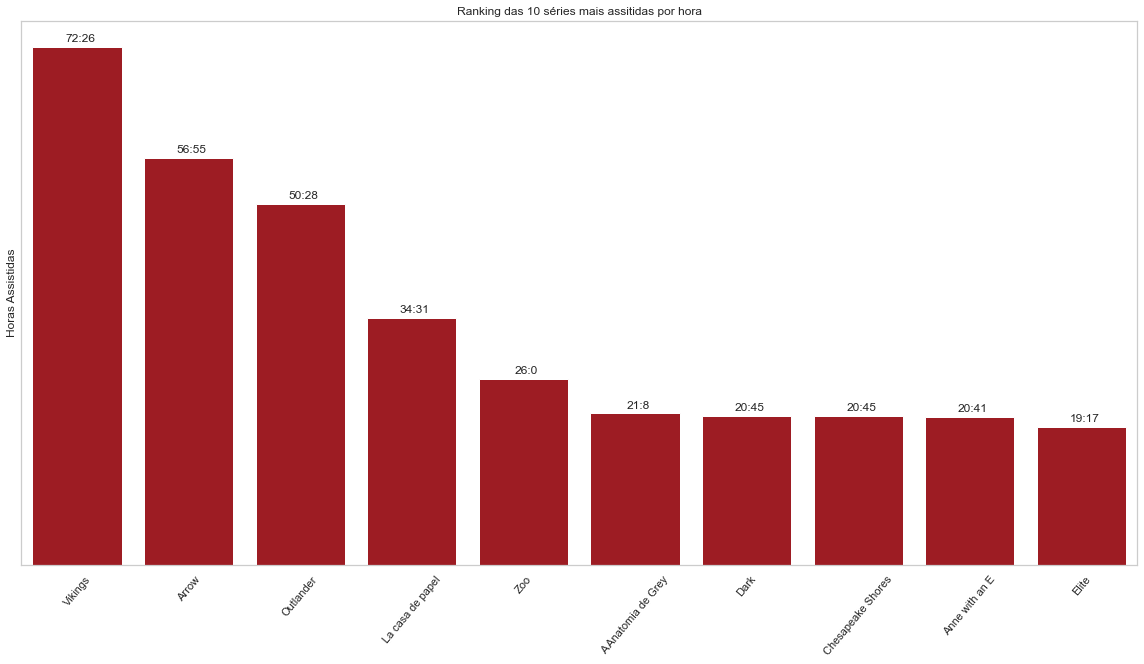

In [30]:
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
bars = sns.barplot( x=series_by_hour.index, y=series_by_hour.values,color='#B20710')
plt.xticks(rotation = 50)
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('Horas Assistidas')
plt.title('Ranking das 10 séries mais assitidas por hora')

for bar in bars.patches:
  height = bar.get_height()
  plt.annotate('{}:{}'.format(int(height/60), int(height%60)),
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(3, 3),
              textcoords="offset points",
              ha='center', va='bottom')

plt.show()

### TOP 10
#### Séries TV (por episódio)

Não esperava que o Arrow estivesse em primeiro colocado, irei analisar de forma mais profunda para buscar insight.

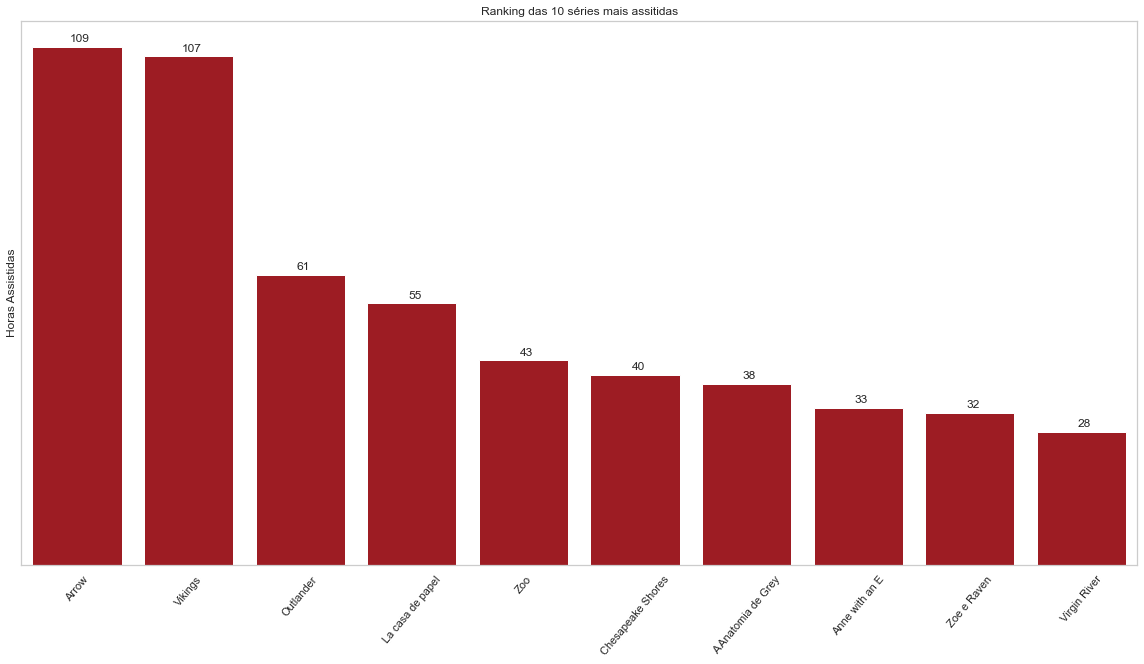

In [31]:
cont = df['Name Title'].value_counts().head(10)
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
bars = sns.barplot( x=cont.index, y=cont.values,color='#B20710')
plt.xticks(rotation = 50)
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('Horas Assistidas')
plt.title('Ranking das 10 séries mais assitidas')

for bar in bars.patches:
  height = bar.get_height()
  plt.annotate('{}'.format(int(height)),
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(3, 3),
              textcoords="offset points",
              ha='center', va='bottom')

plt.show()

### TOP 10
#### Séries TV (episódio de maior duração)

Resultado que já esperava um pouco mas mesmo assim surpresos pela série the witcher, oculpando os três primeiros colocados.

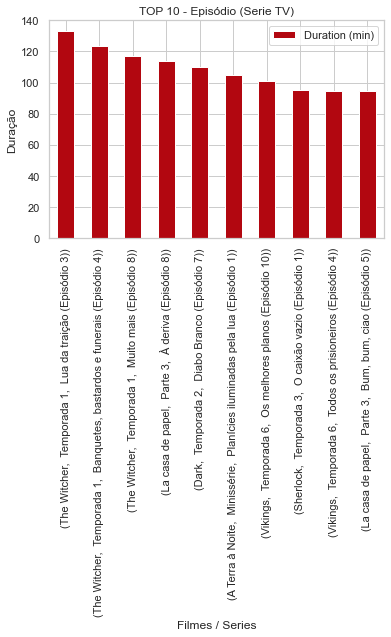

In [32]:
top_10 = df.groupby(['Name Title','Temporada','Episódio']).agg({'Duration (min)':'sum'}).sort_values(by='Duration (min)', ascending=False).head(10)
top_10.plot.bar(color='#B20710')
plt.title('TOP 10 - Episódio (Serie TV)')
plt.xlabel('Filmes / Series',fontsize=12)
plt.ylabel('Duração',fontsize=12)
plt.show()

### Lista dos episódios que mais vezes assistir.

In [33]:
cont_visualização = df.groupby(['Name Title', 'Temporada', 'Episódio'])['Start Time'].agg(['count'])
cont_visualização.sort_values('count', ascending=False).head(20)

count
Name Title                 Temporada    Episódio                                           
A Terra à Noite             Minissérie   Noites congeladas (Episódio 2)                   4
Arrow                       Temporada 2  Ponto fraco (Episódio 11)                        3
Em Busca de Watership Down  Minissérie   O cerco (Episódio 4)                             3
Narcos                      México       Temporada 2: Salvem o tigre (Episódio 1)         3
Arrow                       Temporada 4  Restauração (Episódio 3)                         3
A Terra à Noite             Minissérie   Cidades que não dormem (Episódio 5)              3
                                         Mares escuros (Episódio 4)                       3
Arrow                       Temporada 4  Almas perdidas (Episódio 6)                      3
Vikings                     Temporada 5  O rei pescador (Episódio 1)                      3
Mãe Só Tem Duas             Temporada 1  Final de semana em família (Episódio 7)          3
Vikings                     Temporada 6  Novos começos (Episódio 1)                       3
                                         O Profeta (Episódio 2)                           3
A Anatomia de Grey          Temporada 2  Um curativo no buraco da bala (Episódio 20)      3
La casa de papel            Parte 3      Bum, bum, ciao (Episódio 5)                      3
Arrow                       Temporada 2  Liga dos Assassinos (Episódio 5)                 3
Vikings                     Temporada 6  Todos os prisioneiros (Episódio 4)               3
La casa de papel            Parte 3      À deriva (Episódio 8)                            3
Arrow                       Temporada 1  Um homem inocente (Episódio 4)                   3
                                         Piloto (Episódio 1)                              3
                                         A empresa (Episódio 21)                          3

###  Filmes Vs Séries TV 

Text(0.5, 0, 'Quant. Visualização')

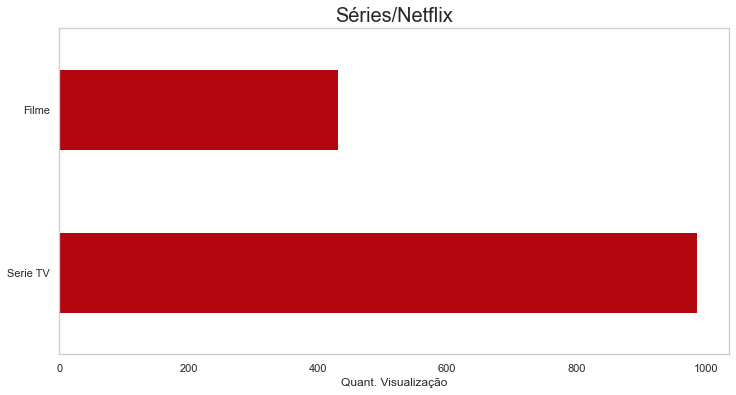

In [34]:
top_10 = df['Type View'].value_counts().head(10)
top_10.plot(kind='barh',figsize=(12,6), grid = False, rot=0,color='#B20710')
plt.title('Séries/Netflix', size=20)
plt.xlabel('Quant. Visualização')

### Analisando a série Arrow

Análisando os meses que foi visto o Arrow, buscando respostas por está em primeiro lugar das serie mais assistidas

In [35]:
Arrow = df.loc[df['Name Title'].str.contains('Arrow', regex=False)]


C:\Users\demet\AppData\Local\Temp/ipykernel_1884/4276686654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['Mês'] = pd.Categorical(Arrow['Mês'], ordered=True)


Text(0.5, 1.0, 'Os meses mais frequentes que assistir a serie TV - Arrow.')

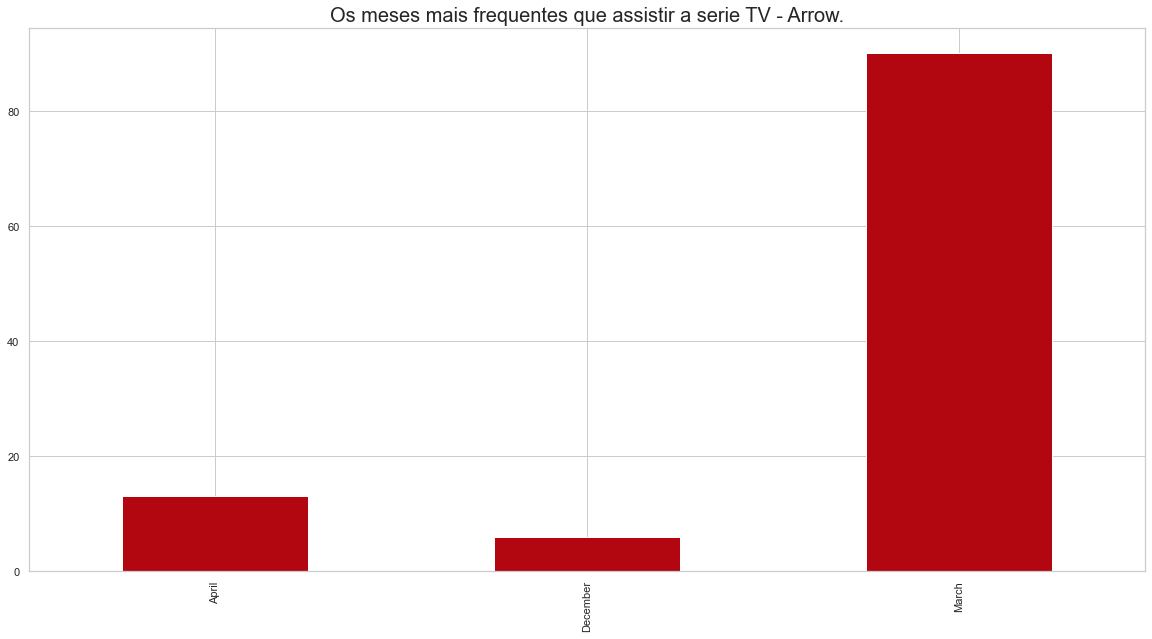

In [36]:
Arrow['Mês'] = pd.Categorical(Arrow['Mês'], ordered=True)
dados_hora = Arrow['Mês'].value_counts()
dados_hora = dados_hora.sort_index()
dados_hora.plot(kind='bar',color='#B20710',figsize=(20,10))
plt.title('Os meses mais frequentes que assistir a serie TV - Arrow.', size=20)

### Analisando os horários da série Arrow, buscando respostas por está em primeiro lugar das serie mais assistidas.

In [37]:
Arrow = df.loc[df['Name Title'].str.contains('Arrow', regex=False)]

C:\Users\demet\AppData\Local\Temp/ipykernel_1884/267928599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['hour'] = pd.Categorical(Arrow['hour'], ordered=True)


Text(0.5, 1.0, 'Os horários mais frequentes que assistir a serie TV - Arrow.')

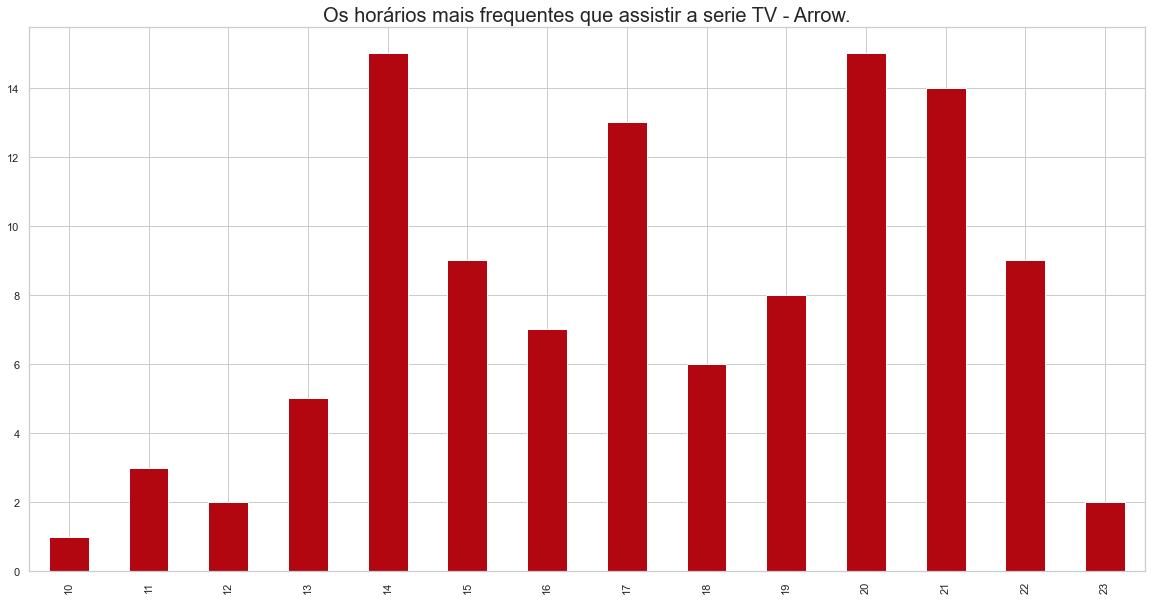

In [38]:
Arrow['hour'] = pd.Categorical(Arrow['hour'], ordered=True)
dados_hora = Arrow['hour'].value_counts()
dados_hora = dados_hora.sort_index()
dados_hora.plot(kind='bar', figsize=(20,10),color='#B20710')
plt.title('Os horários mais frequentes que assistir a serie TV - Arrow.', size=20)

### Nuvem de palavras para os titulos mais populares

(-0.5, 399.5, 199.5, -0.5)

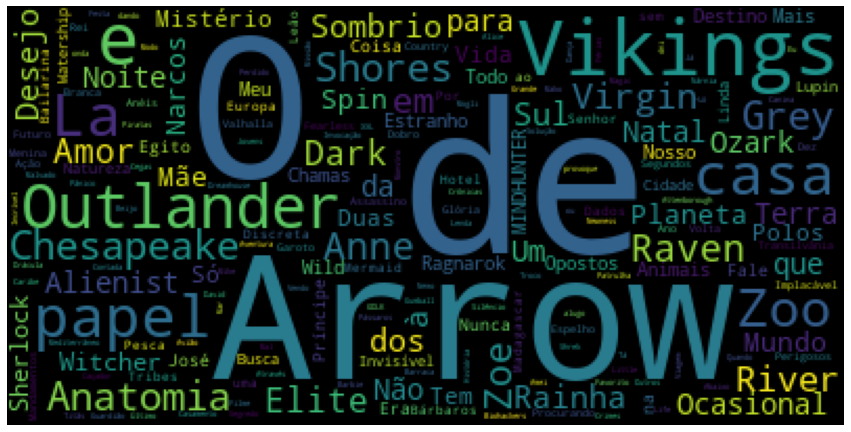

In [39]:
palavras = ' '.join(df['Name Title'])
wordcloud = WordCloud(collocations=False,max_font_size=100).generate(str(palavras))
plt.figure(figsize=[15,10])
plt.imshow(wordcloud)
plt.axis("off")

### Transformando o dataframe em CSV
* NETFLIX

In [40]:
df.to_csv('netflix_demetrio.csv',index=False)

# IMDb

#### A base de dados foi extraida apartir do site oficial da IMDb(https://www.imdb.com/interfaces/)

Carregando a base em CSV com as avaliações do IMDb

In [41]:
IMDb_ratings=pd.read_csv('base dados/title.ratings.tsv',sep='\t',header=0)

Carregando a base em CSV com as informações basicas dos filmes/series.

In [42]:
IMDb=pd.read_csv('base dados/title.basics.tsv',sep='\t',header=0)

C:\Users\demet\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
IMDb.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [44]:
IMDb_ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1745
1,tt0000002,6.0,219
2,tt0000003,6.5,1505
3,tt0000004,6.1,136
4,tt0000005,6.2,2313


Utilizando merge para fundir as duas tabelas apartir da coluna "tconst"

In [45]:
IMDb_nota = pd.merge(IMDb_ratings, IMDb, how = 'left', on = 'tconst')
IMDb_nota.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1745,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,219,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1505,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,136,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2313,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Executando o drop para as colunas que não seram utilizadas

In [46]:
IMDb_nota = IMDb_nota.drop(columns=['titleType','isAdult','endYear','runtimeMinutes'])

In [47]:
IMDb_nota

,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres
0,tt0000001,5.7,1745,Carmencita,Carmencita,1894,"Documentary,Short"
1,tt0000002,6.0,219,Le clown et ses chiens,Le clown et ses chiens,1892,"Animation,Short"
2,tt0000003,6.5,1505,Pauvre Pierrot,Pauvre Pierrot,1892,"Animation,Comedy,Romance"
3,tt0000004,6.1,136,Un bon bock,Un bon bock,1892,"Animation,Short"
4,tt0000005,6.2,2313,Blacksmith Scene,Blacksmith Scene,1893,"Comedy,Short"
...,...,...,...,...,...,...,...
1172906,tt9916682,5.6,5,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,2012,"Animation,Comedy,Family"
1172907,tt9916690,6.6,5,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,2012,"Animation,Comedy,Family"
1172908,tt9916720,5.4,115,The Nun 2,The Nun 2,2019,"Comedy,Horror,Mystery"
1172909,tt9916766,6.9,18,Episode #10.15,Episode #10.15,2019,"Family,Reality-TV"


### Transformando o dataframe em CSV
* IMDb

In [48]:
IMDb_nota.to_csv('IMDb_nota.csv',index=False)

 # Ifood Entregadores

Carregando a base em CSV com as informações de entrega.

In [49]:
ifood = pd.read_csv('Base dados\pedidos.csv')
ifood.head()

,driver_id,numero_pedido,modo_pagamento,modal,regiao,data_pedido,id_entregador,endereco_origem,dt
0,2314743,2539198805,ONLINE,CAR,JOAO PESSOA,2020-11-25 11:57:41.765,68e2a50a-f4a0-4b77-9580-2fd3da80fc3d,"R Edgar Sales De Miranda Henrique, 0, Bessa, J...",2020-11-25
1,2314743,2471294819,ONLINE,CAR,JOAO PESSOA,2020-11-10 13:50:32.458,68e2a50a-f4a0-4b77-9580-2fd3da80fc3d,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-10
2,2314743,2470971620,ONLINE,CAR,JOAO PESSOA,2020-11-10 12:01:58.452,68e2a50a-f4a0-4b77-9580-2fd3da80fc3d,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-10
3,2314743,2471269974,ONLINE,CAR,JOAO PESSOA,2020-11-10 13:37:55.812,68e2a50a-f4a0-4b77-9580-2fd3da80fc3d,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-10
4,2314743,2471366088,ONLINE,CAR,JOAO PESSOA,2020-11-10 14:31:51.046,68e2a50a-f4a0-4b77-9580-2fd3da80fc3d,"R Edgar Sales De Miranda Henrique, 0, Bessa, J...",2020-11-10


### Alterações no DateFrame

In [50]:
ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   driver_id        808 non-null    int64 
 1   numero_pedido    808 non-null    object
 2   modo_pagamento   808 non-null    object
 3   modal            808 non-null    object
 4   regiao           808 non-null    object
 5   data_pedido      808 non-null    object
 6   id_entregador    808 non-null    object
 7   endereco_origem  808 non-null    object
 8   dt               808 non-null    object
dtypes: int64(1), object(8)
memory usage: 56.9+ KB


Alterando o tipo para 'datatime' em duas colunas.

In [51]:
ifood['data_pedido'] = pd.to_datetime(ifood['data_pedido'])
ifood['dt'] = pd.to_datetime(ifood['dt'])

Alterando para datetime a coluna start time e convertendo no horario(brasil UTC-03:00)  

In [52]:
ifood['data_pedido'] = pd.to_datetime(ifood['data_pedido'],utc=True)
ifood = ifood.set_index('data_pedido')
ifood.index = ifood.index.tz_convert('America/Sao_Paulo')
ifood = ifood.reset_index()

Criando as colunas Ano,Mês, dia e dia da semana

In [53]:
ifood['Ano'], ifood['Mês'] = ifood['data_pedido'].dt.year, ifood['data_pedido'].dt.month_name()
ifood['Dia'] = ifood['data_pedido'].dt.day
ifood['hour'] = ifood['data_pedido'].dt.hour
ifood['Dia da Semana'] = ifood['data_pedido'].dt.day_name()

Utilizando a função para gerar a coluna com os nomes dos estabelecimentos derivada da coluna 'endereco_origem'

In [54]:
def mercados(endereco):
    
    if 'Edgar Sales De Miranda Henrique' in endereco:
        cat= 'BIG Bompreço'
    elif "Avenida Senador Ruy Carneiro" in endereco:
        cat="Mercado Classe A"
    elif "Av Epitacio Pessoa, 1450" in endereco:
        cat= "Super Bompreço - Epitacio Pessoa"
    elif "Pc Castro Pinto" in endereco:
        cat= "Super Bompreço - Castro Pinto"
    elif "R Empresario Joao Rodrigues Alves" in endereco:
        cat= "Mercadinho Brilhante"  
    elif "RUA JOSEFA TAVEIRA" in endereco:
        cat= "Supermercado da Gente" 
    elif "R Walfredo Macedo Brandao" in endereco:
        cat= "Mercado Extra" 
    elif "Rua Maria de Lourdes Silva Guedes" in endereco:
        cat= "Verde Vale Supermercado"
    elif "AVENIDA MANDACARU" in endereco:
        cat="O Destakão"
    elif "R. Industrial Danilo da Penha Paiva" in endereco:
        cat="Souza Supermercado"
    elif "Rua Elísio Herculano de Melo" in endereco:
        cat="Supermercado Pague Menos"
    elif "Avenida Governador Antônio da Silva Mariz" in endereco:
        cat="La Quitanda Market"
    elif "Avenida Franca Filho" in endereco:
        cat="Supermercado da Limpeza"
    elif "RUA DEPUTADO JOSE TAVARES" in endereco:
        cat="Supermercado Santo André"
    elif "70608097-50a2-4b61-be4f-9c9e8aba0922" in endereco:
        cat="Kit ifood(álcool)"
    return cat

In [55]:
def latitude(latitude):
    
    if 'Edgar Sales De Miranda Henrique' in latitude:
        cat= '-7.090348'
    elif "Avenida Senador Ruy Carneiro" in latitude:
        cat="-7.115943"
    elif "Av Epitacio Pessoa, 1450" in latitude:
        cat= "-7.119656"
    elif "Pc Castro Pinto" in latitude:
        cat= "-7.125187"
    elif "R Empresario Joao Rodrigues Alves" in latitude:
        cat= "-7.147639"  
    elif "RUA JOSEFA TAVEIRA" in latitude:
        cat= "-7.172844" 
    elif "R Walfredo Macedo Brandao" in latitude:
        cat= "-7.158529" 
    elif "Rua Maria de Lourdes Silva Guedes" in latitude:
        cat= "-7.184770"
    elif "AVENIDA MANDACARU" in latitude:
        cat="-7.107179"
    elif "R. Industrial Danilo da Penha Paiva" in latitude:
        cat="-7.162185"
    elif "Rua Elísio Herculano de Melo" in latitude:
        cat="-7.170993"
    elif "Avenida Governador Antônio da Silva Mariz" in latitude:
        cat="-7.147657"
    elif "Avenida Franca Filho" in latitude:
        cat="-7.110313"
    elif "RUA DEPUTADO JOSE TAVARES" in latitude:
        cat="-7.150057"
    elif "70608097-50a2-4b61-be4f-9c9e8aba0922" in latitude:
        cat="Kit ifood(álcool)"
    return cat

In [56]:
def longitude(longitude):
    
    if 'Edgar Sales De Miranda Henrique' in longitude:
        cat= '-34.846764'
    elif "Avenida Senador Ruy Carneiro" in longitude:
        cat="-34.835320"
    elif "Av Epitacio Pessoa, 1450" in longitude:
        cat= "-34.857350"
    elif "Pc Castro Pinto" in longitude:
        cat= "-34.878366"
    elif "R Empresario Joao Rodrigues Alves" in longitude:
        cat= "-34.844828"  
    elif "RUA JOSEFA TAVEIRA" in longitude:
        cat= "-34.840404" 
    elif "R Walfredo Macedo Brandao" in longitude:
        cat= "-34.838777" 
    elif "Rua Maria de Lourdes Silva Guedes" in longitude:
        cat= "-34.872544"
    elif "AVENIDA MANDACARU" in longitude:
        cat="-34.868724"
    elif "R. Industrial Danilo da Penha Paiva" in longitude:
        cat="-34.869777"
    elif "Rua Elísio Herculano de Melo" in longitude:
        cat="-34.855422"
    elif "Avenida Governador Antônio da Silva Mariz" in longitude:
        cat="-34.817261"
    elif "Avenida Franca Filho" in longitude:
        cat="-34.831393"
    elif "RUA DEPUTADO JOSE TAVARES" in longitude:
        cat="-34.891322"
    elif "70608097-50a2-4b61-be4f-9c9e8aba0922" in longitude:
        cat="Kit ifood(álcool)"
    return cat

Aplicando a função acima para criação da coluna

In [57]:
ifood['Estabelecimento']=ifood['endereco_origem'].apply(mercados)

In [58]:
ifood['Latitude']=ifood['endereco_origem'].apply(latitude)

In [59]:
ifood['Longitude']=ifood['endereco_origem'].apply(longitude)

Exclusão de coluna

In [60]:
ifood.drop('id_entregador', axis=1, inplace=True)

In [61]:
ifood

,data_pedido,driver_id,numero_pedido,modo_pagamento,modal,regiao,endereco_origem,dt,Ano,Mês,Dia,hour,Dia da Semana,Estabelecimento,Latitude,Longitude
0,2020-11-25 08:57:41.765000-03:00,2314743,2539198805,ONLINE,CAR,JOAO PESSOA,"R Edgar Sales De Miranda Henrique, 0, Bessa, J...",2020-11-25,2020,November,25,8,Wednesday,BIG Bompreço,-7.090348,-34.846764
1,2020-11-10 10:50:32.458000-03:00,2314743,2471294819,ONLINE,CAR,JOAO PESSOA,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-10,2020,November,10,10,Tuesday,Mercado Classe A,-7.115943,-34.835320
2,2020-11-10 09:01:58.452000-03:00,2314743,2470971620,ONLINE,CAR,JOAO PESSOA,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-10,2020,November,10,9,Tuesday,Mercado Classe A,-7.115943,-34.835320
3,2020-11-10 10:37:55.812000-03:00,2314743,2471269974,ONLINE,CAR,JOAO PESSOA,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-10,2020,November,10,10,Tuesday,Mercado Classe A,-7.115943,-34.835320
4,2020-11-10 11:31:51.046000-03:00,2314743,2471366088,ONLINE,CAR,JOAO PESSOA,"R Edgar Sales De Miranda Henrique, 0, Bessa, J...",2020-11-10,2020,November,10,11,Tuesday,BIG Bompreço,-7.090348,-34.846764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2021-05-10 15:43:47.235000-03:00,2314743,3173523685,ONLINE,CAR,JOAO PESSOA,"R Empresario Joao Rodrigues Alves, 600, Jardim...",2021-05-10,2021,May,10,15,Monday,Mercadinho Brilhante,-7.147639,-34.844828
804,2021-05-16 18:50:07.002000-03:00,2314743,3191869999,ONLINE,CAR,JOAO PESSOA,"Rua Maria de Lourdes Silva Guedes, 23, Ernesto...",2021-05-16,2021,May,16,18,Sunday,Verde Vale Supermercado,-7.184770,-34.872544
805,2021-03-08 09:16:42.801000-03:00,2314743,2959809018,ONLINE,CAR,JOAO PESSOA,"RUA JOSEFA TAVEIRA, 1250, MANGABEIRA, JOAO PES...",2021-03-08,2021,March,8,9,Monday,Supermercado da Gente,-7.172844,-34.840404
806,2020-11-16 11:03:07.499000-03:00,2314743,2498831456,ONLINE,CAR,JOAO PESSOA,"Avenida Senador Ruy Carneiro, 950, Miramar, JO...",2020-11-16,2020,November,16,11,Monday,Mercado Classe A,-7.115943,-34.835320


## Análise dos Dados

### Quais os endereços que mais coletei pedidos?

In [62]:
ifood.endereco_origem.value_counts().sort_values(ascending=False).head(20)

R Edgar Sales De Miranda Henrique, 0, Bessa, JOAO PESSOA, Brazil                       319
Avenida Senador Ruy Carneiro, 950, Miramar, JOAO PESSOA, Brazil                        232
Av Epitacio Pessoa, 1450, Centro, JOAO PESSOA, Brazil                                  132
Pc Castro Pinto, 57, Centro, JOAO PESSOA, Brazil                                        30
R Empresario Joao Rodrigues Alves, 600, Jardim São Paulo, JOAO PESSOA, Brazil           20
R Walfredo Macedo Brandao, 1112, JARDIM CIDADE UNIVER, JOAO PESSOA, Brazil              16
RUA JOSEFA TAVEIRA, 1250, MANGABEIRA, JOAO PESSOA, Brazil                               16
Rua Maria de Lourdes Silva Guedes, 23, Ernesto Geisel, JOAO PESSOA, Brazil              14
AVENIDA MANDACARU, 319, TREZE DE MAIO, JOAO PESSOA, Brazil                               9
R. Industrial Danilo da Penha Paiva, 406, Cristo Redentor, JOAO PESSOA, Brazil           8
Rua Elísio Herculano de Melo, 6, José Américo de Almeida, JOAO PESSOA, Brazil            6

### Quais o estabelecimentos que mais coletei pedidos?

Text(0.5, 0, 'Quantidade Pedidos')

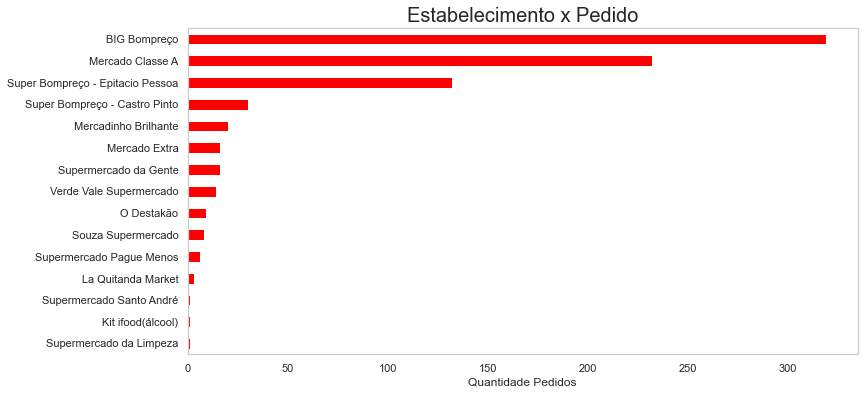

In [63]:
mercados = ifood['Estabelecimento'].value_counts().sort_values().head(15)
mercados.plot(kind='barh',figsize=(12,6), grid = False, rot=0,color='red')
plt.title('Estabelecimento x Pedido', size=20)
plt.xlabel('Quantidade Pedidos')

### Quais meses obtive mais coletas por pedido?

Text(0.5, 1.0, 'Número de pedidos coletados por Mês')

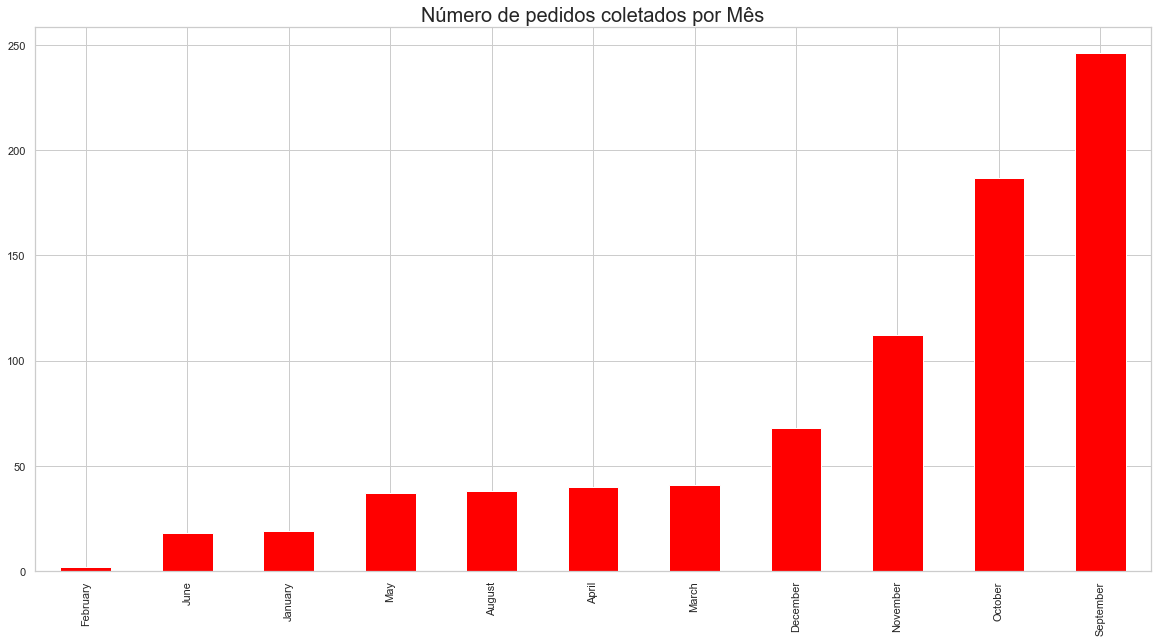

In [64]:
ifood['Mês'] = pd.Categorical(ifood['Mês'], ordered=True)
dados_mes = ifood['Mês'].value_counts()
dados_mes = dados_mes.sort_values()
dados_mes.plot(kind='bar',color='red',figsize=(20,10))
plt.title('Número de pedidos coletados por Mês', size=20)

### Qual ano obtive mais coletas por pedido?

Text(0.5, 1.0, 'Número de pedidos coletados por Ano')

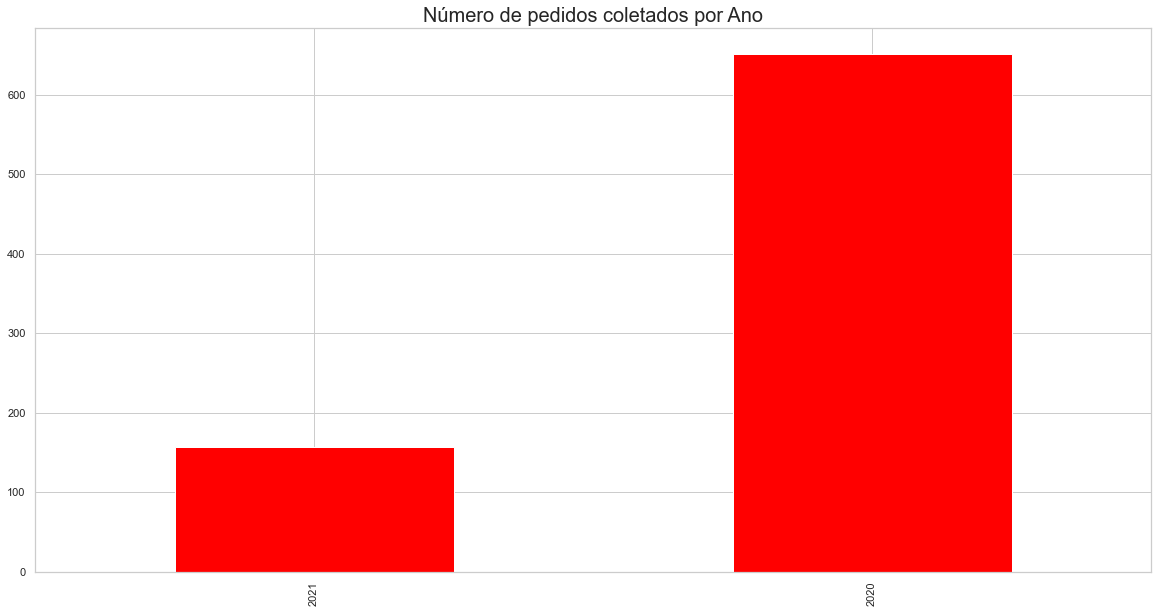

In [65]:
ifood['Ano'] = pd.Categorical(ifood['Ano'], ordered=True)
dados_mes = ifood['Ano'].value_counts()
dados_mes = dados_mes.sort_values()
dados_mes.plot(kind='bar',color='red',figsize=(20,10))
plt.title('Número de pedidos coletados por Ano', size=20)

### Quais os horarios mais frequentes por pedido?

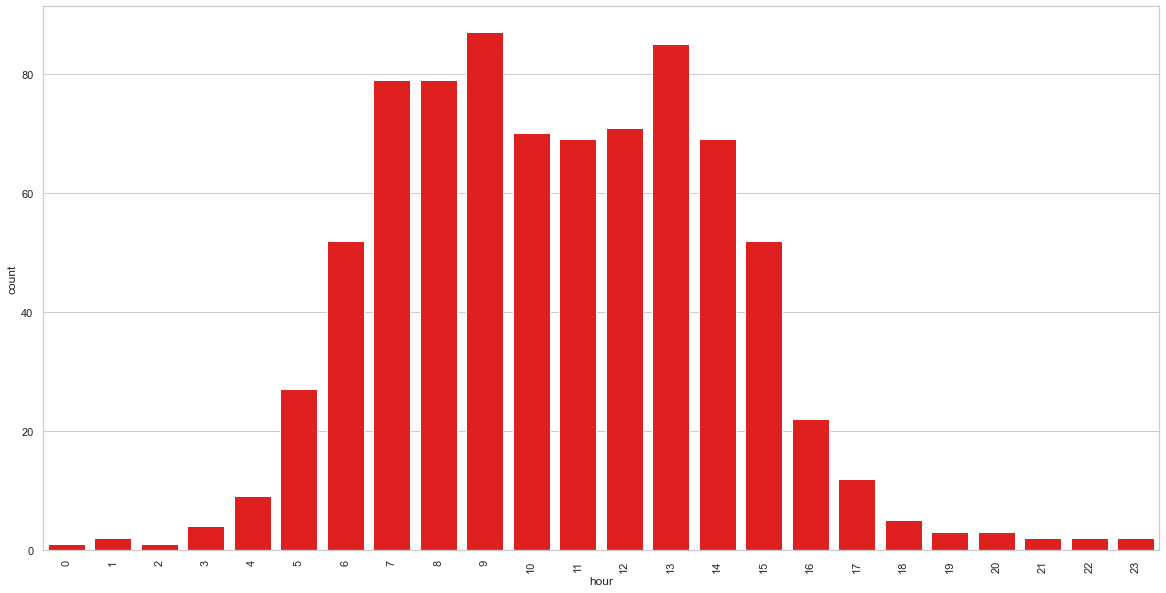

In [66]:
plt.subplots(figsize=(20, 10))
g=sns.countplot(x="hour",data = ifood,color='red')
labels=g.set_xticklabels(rotation=90,labels=g.get_xticklabels())

### Gráfico de dispersão para demosnstrar de forma mais visivel o volume de pedidos por estabelecimentos.

C:\Users\demet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


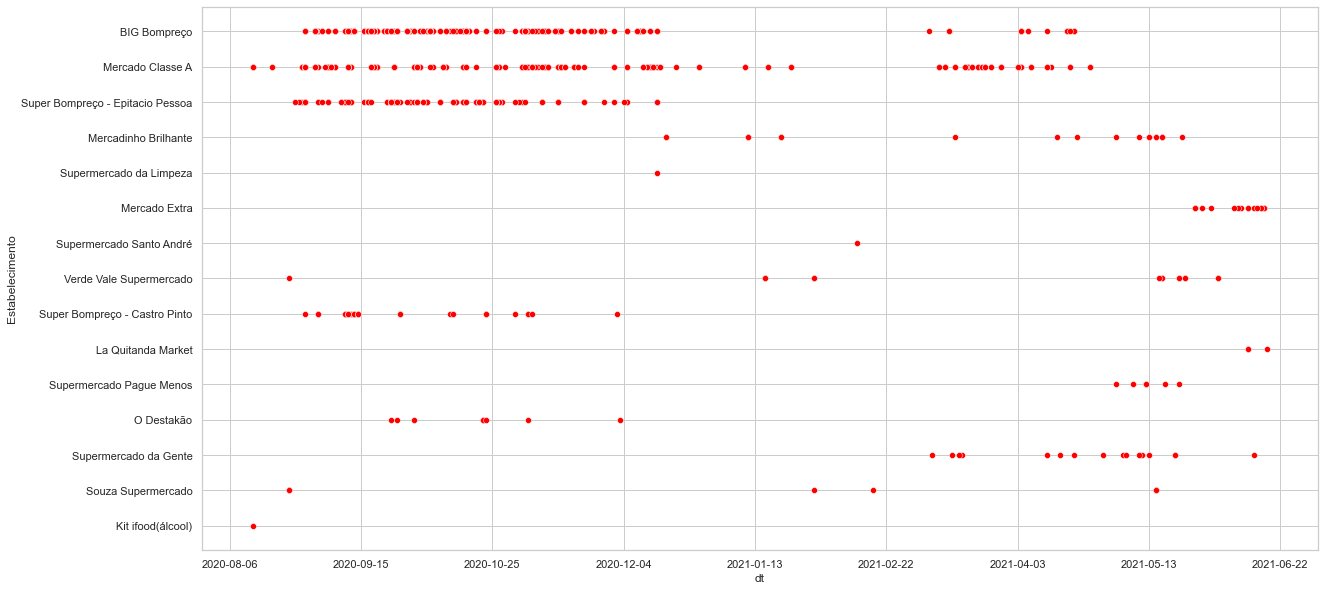

In [67]:
plt.subplots(figsize=(20, 10))

sns.scatterplot(ifood["dt"],ifood["Estabelecimento"],color='red')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()

### Transformando o dataframe em CSV
* Ifood Entregador

In [68]:
ifood.to_csv('ifood.csv',index=False)

# NAVEGADOR WEB (Browser)

Importando a base de dados da historico de navegação.

In [69]:
browser = pd.read_csv('Base dados\history_browser.csv')
browser.head()

,URL,Title,Visit Time,Visit Count,Visited From,Visit Type,Web Browser,User Profile,Browser Profile,URL Length,Typed Count,History File,Record ID
0,NaN,Purificador de �gua Compressor IBBL Due Immagi...,23/06/2021 14:37:27,1,https://www.shoptime.com.br/produto/79585880/p...,NaN,Edge (Chromium-based),demet,Default,0,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,68363
1,?,NaN,29/06/2021 18:11:00,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,24
2,?,NaN,29/06/2021 18:33:32,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,34
3,?,NaN,04/08/2021 21:16:44,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2877
4,?,NaN,29/06/2021 18:33:52,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,41


In [70]:
browser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49376 entries, 0 to 49375
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              49375 non-null  object 
 1   Title            48402 non-null  object 
 2   Visit Time       49376 non-null  object 
 3   Visit Count      49376 non-null  int64  
 4   Visited From     13359 non-null  object 
 5   Visit Type       8230 non-null   object 
 6   Web Browser      49376 non-null  object 
 7   User Profile     49376 non-null  object 
 8   Browser Profile  48985 non-null  object 
 9   URL Length       49376 non-null  int64  
 10  Typed Count      6511 non-null   float64
 11  History File     49376 non-null  object 
 12  Record ID        49376 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 4.9+ MB


### Alterações no DateFrame

In [71]:
browser['Visit Time'] = browser['Visit Time'].apply(lambda x: x[:-8])
browser

,URL,Title,Visit Time,Visit Count,Visited From,Visit Type,Web Browser,User Profile,Browser Profile,URL Length,Typed Count,History File,Record ID
0,NaN,Purificador de �gua Compressor IBBL Due Immagi...,23/06/2021,1,https://www.shoptime.com.br/produto/79585880/p...,NaN,Edge (Chromium-based),demet,Default,0,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,68363
1,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,24
2,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,34
3,?,NaN,04/08/2021,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2877
4,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49371,ms-pbi://pbi.microsoft.com/pbi/Web/Views/MainW...,NaN,22/07/2020,5,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,55,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,1
49372,ms-pbi://pbi.microsoft.com/Views/KoForm.htm,NaN,22/07/2020,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,43,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,3
49373,ms-pbi://pbi.microsoft.com/Views/KoForm.htm,NaN,04/08/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,43,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2971
49374,ms-settings:sound,NaN,30/07/2021,2,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,17,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2718


Limpeza de dados (excluindo Null)

In [72]:
browser.dropna(subset =['URL'], inplace=True)

In [73]:
browser.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49375 entries, 1 to 49375
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              49375 non-null  object 
 1   Title            48401 non-null  object 
 2   Visit Time       49375 non-null  object 
 3   Visit Count      49375 non-null  int64  
 4   Visited From     13358 non-null  object 
 5   Visit Type       8230 non-null   object 
 6   Web Browser      49375 non-null  object 
 7   User Profile     49375 non-null  object 
 8   Browser Profile  48984 non-null  object 
 9   URL Length       49375 non-null  int64  
 10  Typed Count      6511 non-null   float64
 11  History File     49375 non-null  object 
 12  Record ID        49375 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 5.3+ MB


In [74]:
browser

,URL,Title,Visit Time,Visit Count,Visited From,Visit Type,Web Browser,User Profile,Browser Profile,URL Length,Typed Count,History File,Record ID
1,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,24
2,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,34
3,?,NaN,04/08/2021,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2877
4,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,41
5,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49371,ms-pbi://pbi.microsoft.com/pbi/Web/Views/MainW...,NaN,22/07/2020,5,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,55,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,1
49372,ms-pbi://pbi.microsoft.com/Views/KoForm.htm,NaN,22/07/2020,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,43,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,3
49373,ms-pbi://pbi.microsoft.com/Views/KoForm.htm,NaN,04/08/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,43,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2971
49374,ms-settings:sound,NaN,30/07/2021,2,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,17,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2718


Função para gerar a coluna categoria derivada da URL

In [75]:
def categorias(url):
    
    if 'stackoverflow.com' in url:
        cat= 'Stackoverflow'
    elif "www.google.com" in url:
        cat="Busca_Google"
    elif "zoom.us" in url:
        cat= "Aulas_Resilia"
    elif "youtube.com" in url:
        cat= "Video"
    elif "python" in url:
        cat= "Python"  
    elif "dados" in url:
        cat= "Dados" 
    elif "sql" in url:
        cat= "SQL" 
    elif "outlook.com" in url:
        cat= "e-mail"
    elif "linkedin.com" in url:
        cat="Linkedin"
    elif "classroom.google.com" in url:
        cat="Classroom_Resilia"
    elif "github.com" in url:
        cat="Github"
    elif "ifood" in url:
        cat="ifood"
    elif "facebook.com" in url or "instagram.com" in url:
        cat="Rede social"
    else: 
        cat= "Outros"
    return cat

In [76]:
browser['Categoria']=browser['URL'].apply(categorias)

## Análise dos Dados

#### DataFrame

In [77]:
browser

,URL,Title,Visit Time,Visit Count,Visited From,Visit Type,Web Browser,User Profile,Browser Profile,URL Length,Typed Count,History File,Record ID,Categoria
1,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,24,Outros
2,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,34,Outros
3,?,NaN,04/08/2021,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2877,Outros
4,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,41,Outros
5,?,NaN,29/06/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,2,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,52,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49371,ms-pbi://pbi.microsoft.com/pbi/Web/Views/MainW...,NaN,22/07/2020,5,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,55,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,1,Outros
49372,ms-pbi://pbi.microsoft.com/Views/KoForm.htm,NaN,22/07/2020,4,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,43,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,3,Outros
49373,ms-pbi://pbi.microsoft.com/Views/KoForm.htm,NaN,04/08/2021,1,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,43,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2971,Outros
49374,ms-settings:sound,NaN,30/07/2021,2,NaN,NaN,Internet Explorer 10/11 / Edge,demet,NaN,17,NaN,C:\Users\demet\AppData\Local\Microsoft\Windows...,2718,Outros


### Sites mais acessados

In [78]:
site_visitados = browser.groupby(['URL'], as_index=False).size()
site_visitados.sort_values(by=['size'], ascending=False).head(20)

,URL,size
22798,https://www.youtube.com/,506
25429,https://www2.olx.com.br/ai/form/0,321
20680,https://www.linkedin.com/feed/,275
20399,https://www.instagram.com/stories/highlights/1...,201
7410,https://outlook.live.com/mail/0/inbox,193
20631,https://www.linkedin.com/,175
7945,https://outlook.live.com/mail/inbox,175
2946,https://docs.google.com/document/d/1PD59Q88Q99...,139
8103,https://outlook.live.com/owa/,132
22280,https://www.selpics.com/selecao/,131


### Análise das categorias por periodo visualizado (Gráfico de dispersão)

C:\Users\demet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


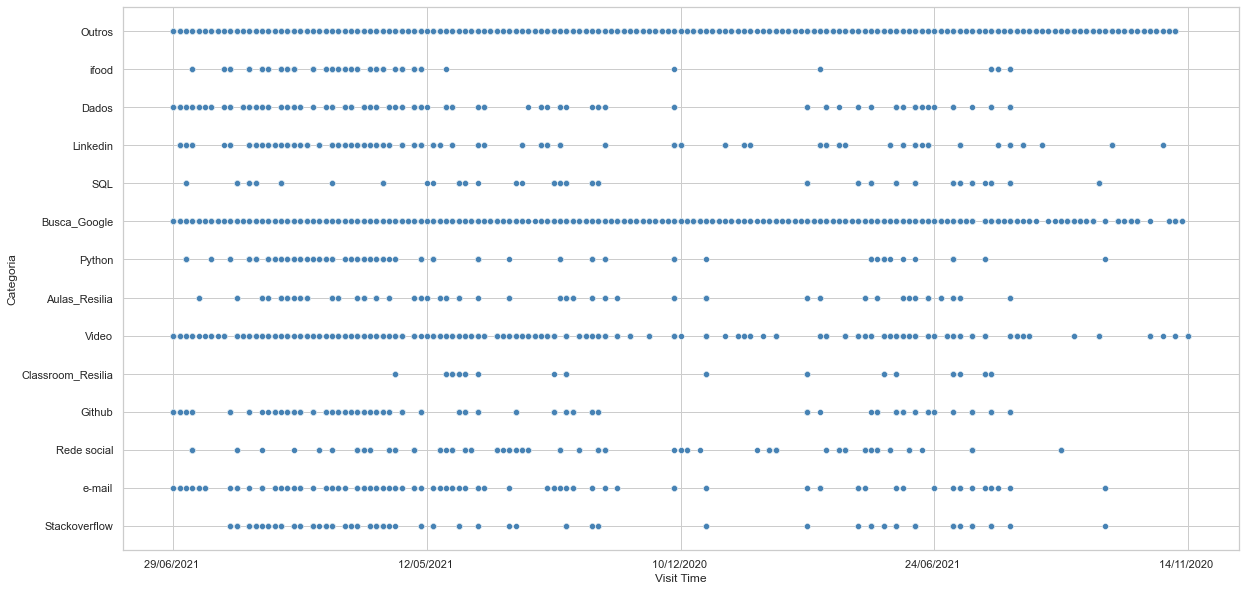

In [79]:
plt.subplots(figsize=(20, 10))

sns.scatterplot(browser["Visit Time"],browser["Categoria"],color='steelblue')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()

### Porcentagem das categorias por período visualizado

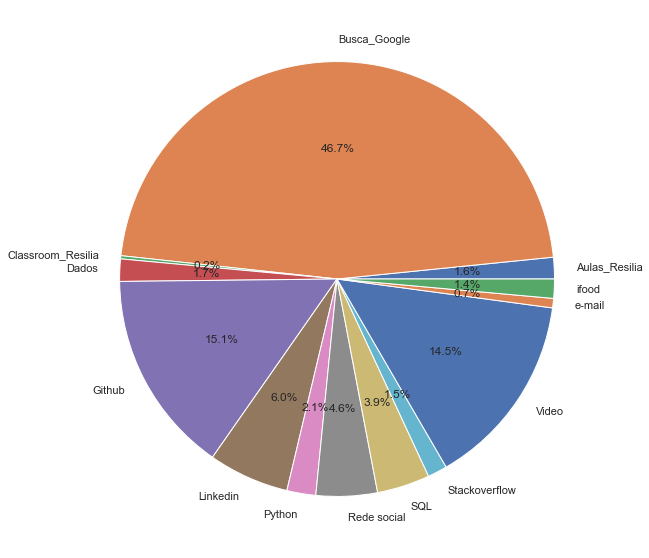

In [80]:
pizza_categoria=browser[browser["Categoria"]!="Outros"].groupby("Categoria").count()
labels= pizza_categoria.index.unique()
fig1, ax1 = plt.subplots(figsize=(20, 10))

cat_plot=ax1.pie(pizza_categoria['Visit Time'], labels=labels,autopct='%1.1f%%')

### Analisando a palavara python na URL.

DataFrame

In [81]:
python = browser.loc[browser['URL'].str.contains('python','Python', regex=False)==True]
python

,URL,Title,Visit Time,Visit Count,Visited From,Visit Type,Web Browser,User Profile,Browser Profile,URL Length,Typed Count,History File,Record ID,Categoria
609,http://geoffboeing.com/2016/06/mapping-google-...,Mapping Your Google Location History with Pyth...,20/07/2021,1,NaN,NaN,Edge (Chromium-based),demet,Default,70,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,79608,Python
788,http://localhost:8850/notebooks/anaconda3/Unti...,Untitled3 - Jupyter Notebook,11/07/2021,1,NaN,NaN,Edge (Chromium-based),demet,Default,77,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,75412,Python
789,http://localhost:8850/notebooks/Untitled1.ipyn...,Untitled1 - Jupyter Notebook,11/07/2021,1,NaN,NaN,Edge (Chromium-based),demet,Default,67,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,75414,Python
790,http://localhost:8850/notebooks/Untitled4.ipyn...,Untitled4 - Jupyter Notebook,11/07/2021,1,NaN,NaN,Edge (Chromium-based),demet,Default,67,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,75428,Python
812,http://localhost:8888/notebooks/Alura%20-%20Pa...,Untitled - Jupyter Notebook,12/07/2021,1,NaN,NaN,Edge (Chromium-based),demet,Default,98,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,75495,Python
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46359,https://www.youtube.com/results?search_query=s...,statistics python biblioteca - YouTube,10/06/2021,2,NaN,NaN,Edge (Chromium-based),demet,Default,73,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,64332,Video
46360,https://www.youtube.com/results?search_query=s...,statistics python biblioteca - YouTube,10/06/2021,2,NaN,NaN,Edge (Chromium-based),demet,Default,73,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,64334,Video
46420,https://www.youtube.com/results?search_query=t...,tableau python - YouTube,13/06/2021,2,NaN,NaN,Edge (Chromium-based),demet,Default,59,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,65034,Video
46421,https://www.youtube.com/results?search_query=t...,tableau python - YouTube,23/06/2021,2,NaN,NaN,Edge (Chromium-based),demet,Default,59,NaN,C:\Users\demet\AppData\Local\Microsoft\Edge\Us...,68312,Video


### Transformando o dataframe em CSV
* Navegador Web (Browser)

In [82]:
browser.to_csv('browser.csv',index=False)

# Search Google

Importando a base de dados (Search Google)

In [83]:
search = pd.read_json('Base dados\Minhaatividade.json')

In [84]:
search.shape

(109589, 7)

In [85]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109589 entries, 0 to 109588
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   header         109589 non-null  object
 1   title          109589 non-null  object
 2   titleUrl       108938 non-null  object
 3   time           109589 non-null  object
 4   products       109589 non-null  object
 5   locationInfos  25983 non-null   object
 6   details        3 non-null       object
dtypes: object(7)
memory usage: 5.9+ MB


### Alterações no DateFrame

Alterando para datetime a coluna start time e convertendo no horario(brasil UTC-03:00)  

Retirando os milissegundos da coluna 'time'

In [86]:
search['time'] = search['time'].apply(lambda x: x[:-5])

In [87]:
search['time'] = pd.to_datetime(search['time'],utc=True)
search = search.set_index('time')
search.index = search.index.tz_convert('America/Sao_Paulo')
search = search.reset_index()

Criando as colunas Ano,Mês

In [88]:
search['Ano'], search['Mês'] = search['time'].dt.year, search['time'].dt.month_name()
search['Dia'] = search['time'].dt.day

### Limpeza de dados

Limpeza na coluna "title" exclusão de palavras geradas de forma automatica pelo google, que podem atrapalhar na análise)

In [89]:
search.drop(search.loc[search['title']=='Visited Google Search'].index, inplace=True)

In [90]:
search.drop(search.loc[search['title']=='Used Search'].index, inplace=True)

In [91]:
search['title'] = search['title'].str.replace('Visited','')

In [92]:
search['title'] = search['title'].str.replace('Searched for','')

In [93]:
search['title'] = search['title'].str.replace('Viewed','')  

Excluindo os anos anteriores a 2019

In [94]:
search.drop(search[search['Ano']<2019].index, inplace=True)

## Análise dos Dados

#### DataFrame

In [95]:
search

,time,header,title,titleUrl,products,locationInfos,details,Ano,Mês,Dia
0,2021-07-17 19:38:14-03:00,Search,Não é possível conextar a arquivos KML do Goo...,https://www.google.com/url?q=https://kb.tablea...,[Search],NaN,NaN,2021,July,17
1,2021-07-17 19:37:55-03:00,Search,formato kml tableau,https://www.google.com/search?q=formato+kml+ta...,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2021,July,17
2,2021-07-17 19:37:33-03:00,Search,formato kml,https://www.google.com/search?q=formato+kml,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2021,July,17
3,2021-07-17 19:24:04-03:00,Search,Gmail - Google,https://www.google.com/gmail/,[Search],NaN,NaN,2021,July,17
4,2021-07-17 19:24:02-03:00,Search,gmail,https://www.google.com/search?q=gmail,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2021,July,17
...,...,...,...,...,...,...,...,...,...,...
28121,2019-01-02 09:13:49-02:00,Search,glau hamburgueria bessa,https://www.google.com/search?q=glau+hamburgue...,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,2
28122,2019-01-02 09:13:43-02:00,Search,glau hambúrguer bessa,https://www.google.com/search?q=glau+hamb%C3%B...,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,2
28123,2019-01-02 09:13:32-02:00,Search,glau hambúrguer,https://www.google.com/search?q=glau+hamb%C3%B...,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,2
28124,2019-01-01 01:23:33-02:00,Search,file mignon suino,https://www.google.com/search?q=file+mignon+suino,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,1


Busca no google por ano/mês (contagem)

In [96]:
search[(search.time.dt.year == 2020)].time.dt.month.value_counts().sort_values()

11      71
10     111
4      260
5      424
3      425
6      426
2      482
12     785
9      834
1     1204
8     1224
7     1386
Name: time, dtype: int64

In [97]:
search[(search.time.dt.year == 2021)].time.dt.month.value_counts().sort_values()

7     749
1    1220
2    1333
4    1527
3    1787
6    1898
5    2053
Name: time, dtype: int64

Importando biblioteca nltk (Processamento de linguagem natural) 

In [98]:
import nltk.corpus

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\demet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [101]:
google = search.copy()

In [102]:
google['title'] = google['title'].str.lower().str.split()

In [103]:
google['title'] = google['title'].apply(lambda x: ' '.join([item for item in x if item not in stopwords]))

Repartindo a coluna "Title" por palavra, para analisar quantas vezes aparece cada palavra nas buscas.

In [104]:
copy = (google.title.str.split(expand=True)).stack()
copy.index = copy.index.droplevel(-1)
copy.name= 'title'
google = google.drop(['title'], axis=1)
google = (google.join(copy))
google

,time,header,titleUrl,products,locationInfos,details,Ano,Mês,Dia,title
0,2021-07-17 19:38:14-03:00,Search,https://www.google.com/url?q=https://kb.tablea...,[Search],NaN,NaN,2021,July,17,possível
0,2021-07-17 19:38:14-03:00,Search,https://www.google.com/url?q=https://kb.tablea...,[Search],NaN,NaN,2021,July,17,conextar
0,2021-07-17 19:38:14-03:00,Search,https://www.google.com/url?q=https://kb.tablea...,[Search],NaN,NaN,2021,July,17,arquivos
0,2021-07-17 19:38:14-03:00,Search,https://www.google.com/url?q=https://kb.tablea...,[Search],NaN,NaN,2021,July,17,kml
0,2021-07-17 19:38:14-03:00,Search,https://www.google.com/url?q=https://kb.tablea...,[Search],NaN,NaN,2021,July,17,google
...,...,...,...,...,...,...,...,...,...,...
28124,2019-01-01 01:23:33-02:00,Search,https://www.google.com/search?q=file+mignon+suino,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,1,mignon
28124,2019-01-01 01:23:33-02:00,Search,https://www.google.com/search?q=file+mignon+suino,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,1,suino
28125,2019-01-01 00:10:57-02:00,Search,https://www.google.com/search?q=tampa+som+ouvido,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,1,tampa
28125,2019-01-01 00:10:57-02:00,Search,https://www.google.com/search?q=tampa+som+ouvido,[Search],"[{'name': 'At this general area', 'url': 'http...",NaN,2019,January,1,som


Lista das palavras mais buscadas

In [105]:
google.title.value_counts().sort_values(ascending=False).head(15)

-          4458
...        2720
|          1679
pessoa     1289
python     1009
joão        934
joao        465
pb          338
–           319
cupom       311
brasil      311
stack       301
rua         289
youtube     278
dados       256
Name: title, dtype: int64

A palavra 'Python' buscada por ano.

In [106]:
google.dropna(subset =['title'], inplace=True)

In [107]:
python = google.loc[google['title'].str.contains('python','Python', regex=False)]

C:\Users\demet\AppData\Local\Temp/ipykernel_1884/437062721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python['Ano'] = pd.Categorical(python['Ano'], ordered=True)


Text(0.5, 1.0, 'Busca por ano por pela palavra python? ')

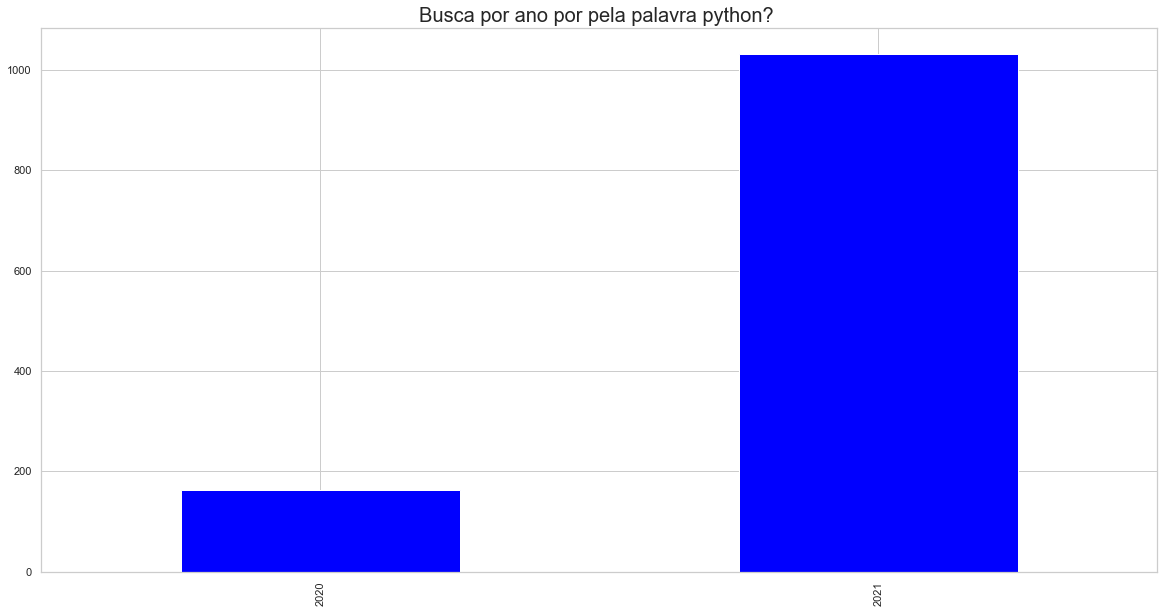

In [108]:
python['Ano'] = pd.Categorical(python['Ano'], ordered=True)
dados_hora = python['Ano'].value_counts()
dados_hora = dados_hora.sort_index()
dados_hora.plot(kind='bar', figsize=(20,10),color='blue')
plt.title('Busca por ano por pela palavra python? ', size=20)

### Transformando o dataframe em CSV
* Search Google

In [109]:
google.to_csv('google.csv',index=False)